#### This is the Exploratory data analysis of videogames sales gratter than 10.000 copies

!["Game image"](/home/alexhero/Documents/video_games_sales-EDA/game_image.jpg)

### Data Introduction

The dataset contains information about video games, including, sales, plataform, genre, publisher, etc.<br>
Here are some key columns:

        -Rank - Ranking of overall sales
        -Name - The games name
        -Platform - Platform of the games release (i.e. PC,PS4, etc.)
        -Year - Year of the game's release
        -Genre - Genre of the game
        -Publisher - Publisher of the game
        -NA_Sales - Sales in North America (in millions)
        -EU_Sales - Sales in Europe (in millions)
        -JP_Sales - Sales in Japan (in millions)
        -Other_Sales - Sales in the rest of the world (in millions)
        -Global_Sales - Total worldwide sales.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/home/alexhero/Documents/video_games_sales-EDA/vgsales.csv")
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df['Year'].fillna(df['Year'].mode()[0], inplace=True)
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
df['Year'] = df['Year'].astype(int)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Global sales

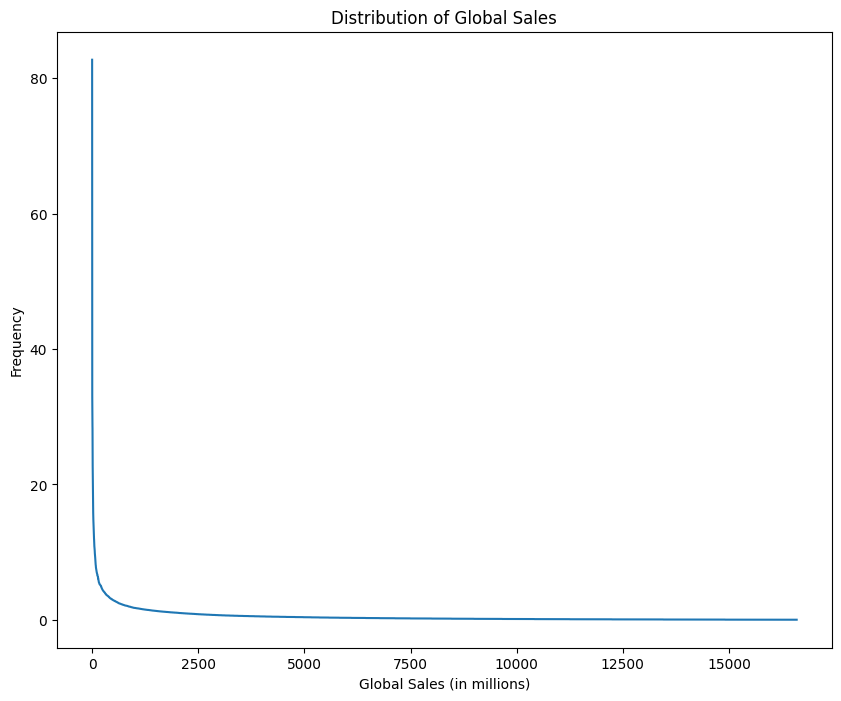

In [8]:
plt.figure(figsize=(10,8))
sns.lineplot(df['Global_Sales'])
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

### Top Publishers

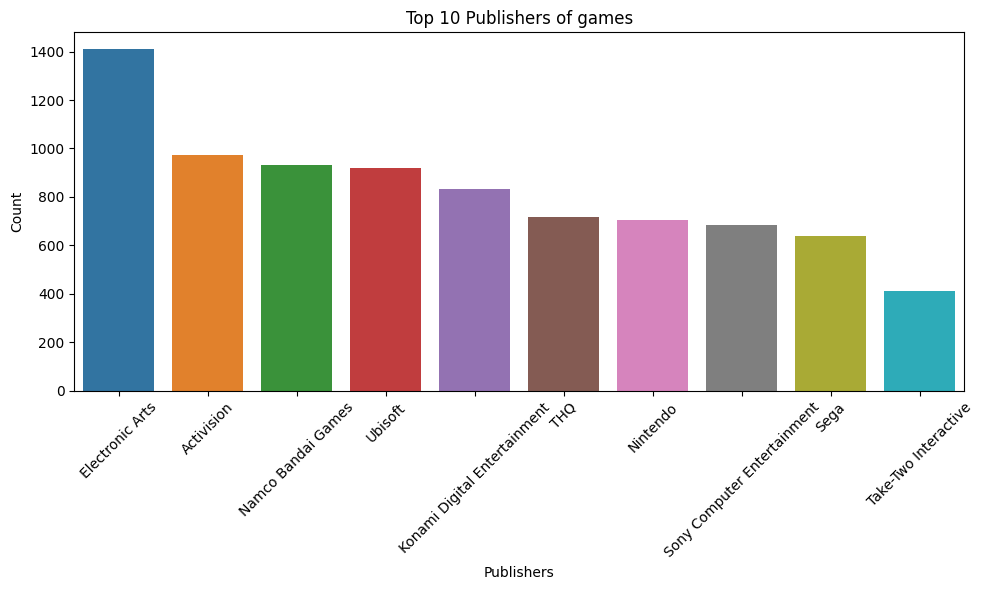

In [9]:
top_pub = df['Publisher'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= top_pub.index, y= top_pub.values, palette='tab10')
plt.title("Top 10 Publishers of games")
plt.xlabel("Publishers")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top Genres

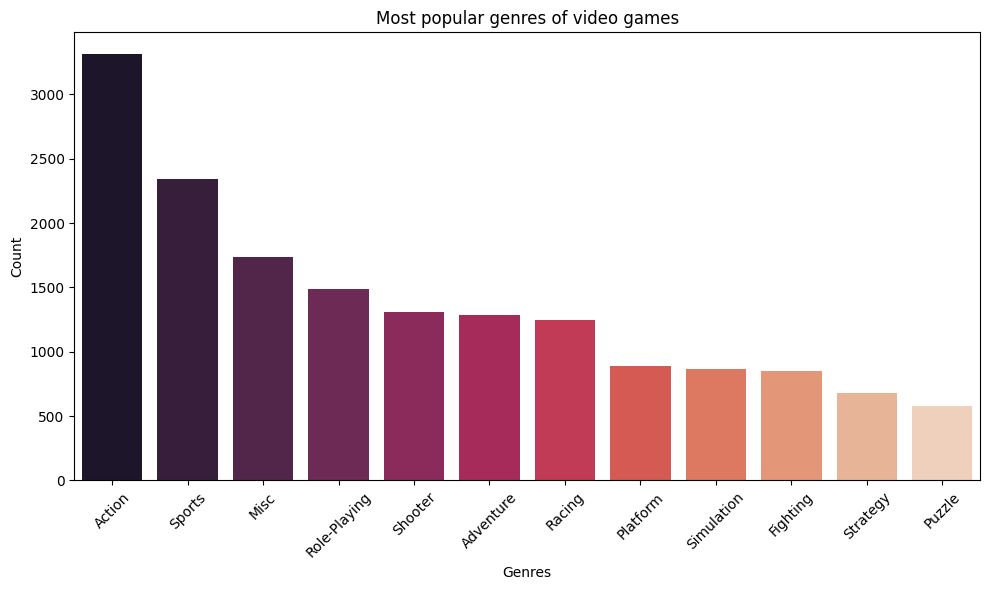

In [10]:
top_genes = df['Genre'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=top_genes.index, y= top_genes.values, palette="rocket")
plt.title("Most popular genres of video games")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Wise year sales

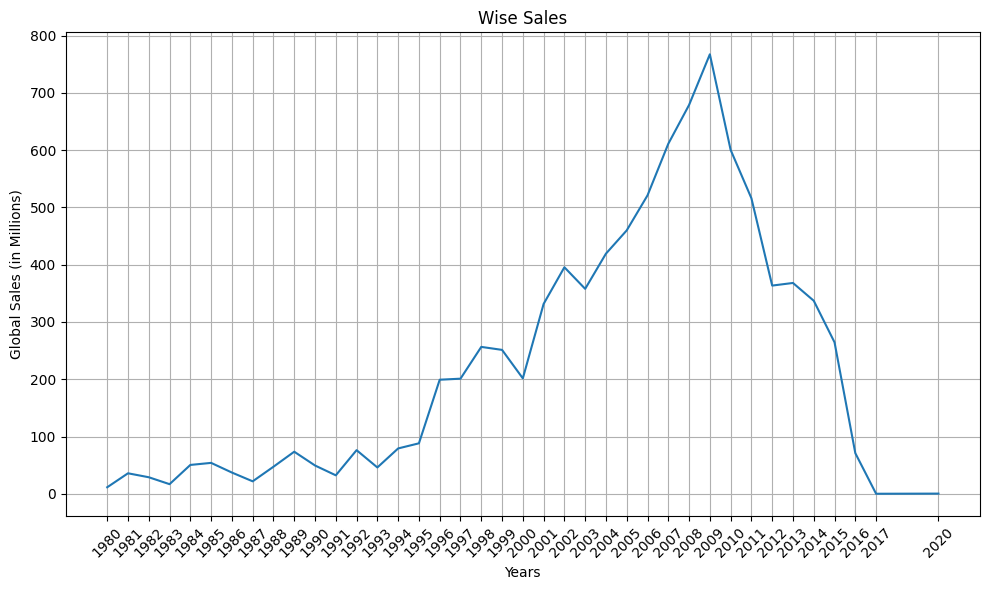

In [11]:
best_year_sale = df.groupby("Year")['Global_Sales'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=best_year_sale.index, y= best_year_sale.values)
plt.title("Wise Sales")
plt.xlabel("Years")
plt.ylabel("Global Sales (in Millions)")
plt.xticks(ticks=best_year_sale.index, rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### Most Popular Plataform

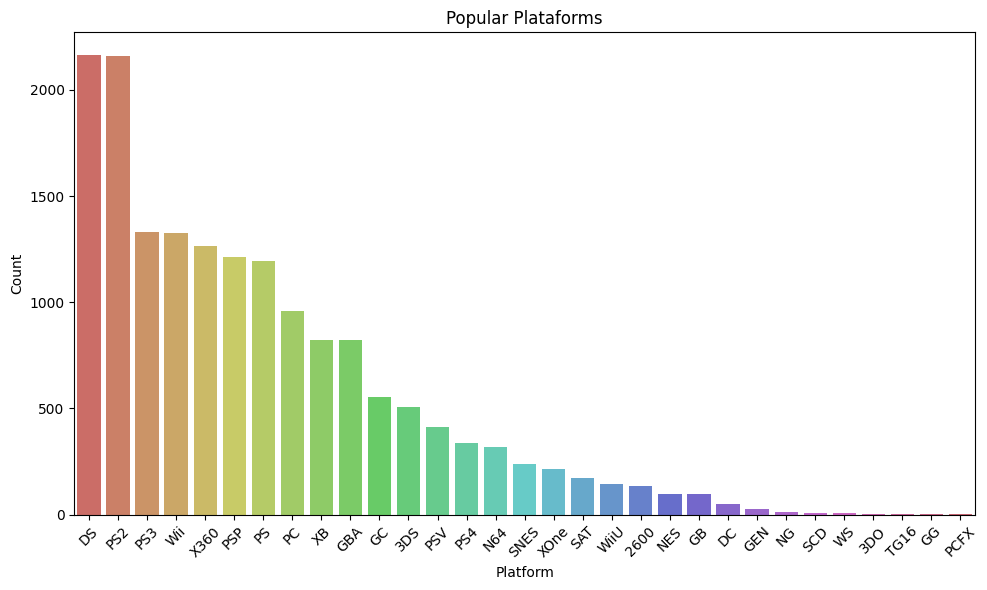

In [12]:
plat = df['Platform'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=plat.index, y= plat.values, palette="hls")
plt.title("Popular Plataforms")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

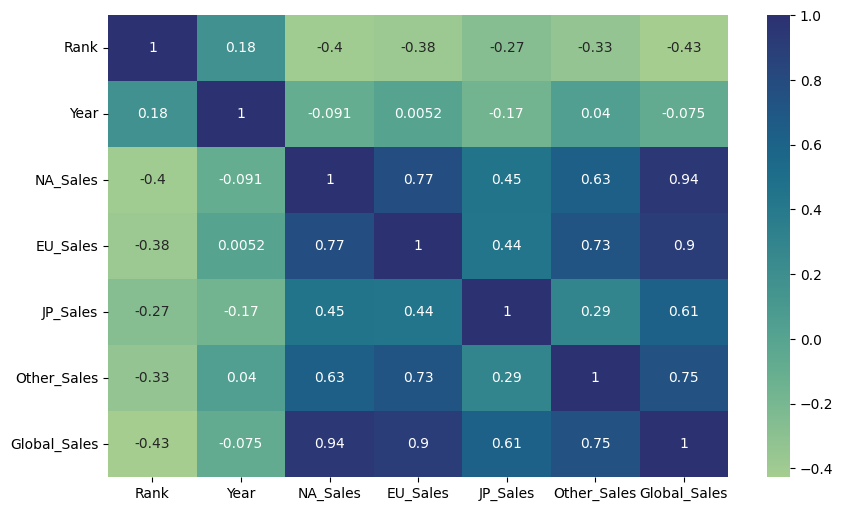

In [13]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='crest')

### Most popular games

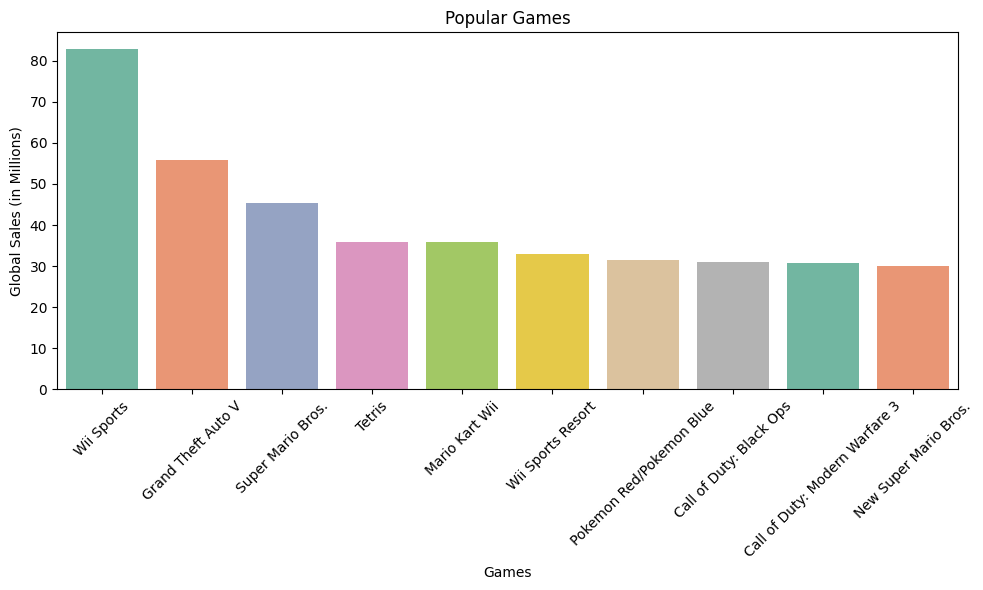

In [14]:
games = df.groupby('Name')['Global_Sales'].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=games.index, y= games.values, palette="Set2")
plt.title("Popular Games")
plt.xlabel("Games")
plt.ylabel("Global Sales (in Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Machine Learning Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


x = df[['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
y= df['Global_Sales']

x = pd.get_dummies(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"The R² is: {r2}")
print(f"The MSE is: {mse}")



